# L96-EBM Freezing

In this notebook we show how the L96 changes as $S$ cross the cool threshold.

In [1]:
from plotting_IO import *
from scipy.interpolate import interp1d

In [2]:
# plot_save_dir = '/Users/cfn18/Documents/PhD-Work/Third-Year/Instanton-Work/L96-EBM-Instanton/Working-Document/tex/Deterministic_Model/img/'
plot_save_dir = '/Users/cfn18/Documents/PhD-Work/Third-Year/Thesis/img/L96-EBM/'

In [13]:
from scipy.stats import gaussian_kde
def histogram_plot(x, *args, grid_points=100, fax=None, **kwargs):
    "Uses kde to plot histogram of transient lifetimes"

    # Init fax
    if fax is None:
        fax = init_2d_fax()
    fig, ax = fax

    # Plot Histogram
    kde = gaussian_kde(x)
    xs = np.linspace(x.min() - x.std(), x.max() + x.std(), grid_points)
    ax.plot(xs, kde(xs), *args, **kwargs)
    ax.set_xlabel('$X_{i,j}$')
    ax.set_ylabel('$\\rho$')
    return fig, ax

In [3]:
# Figuring out threshold for L96 forcing to be above 5

# L96-EBM Parameters
T_ref = 270
delta_T = 60
beta = 1

# Threshold for L96 forcing to be above 5
T_threshold = (5/8 - 1) * delta_T/beta + T_ref

## Plotting what happens to T

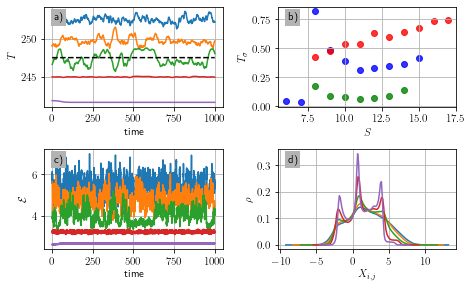

In [14]:
fig, axes = init_2d_fax(ncols=2, nrows=2)

S_boundary_values = np.flip([6, 7, 8, 9, 10])

# Plotting T Timeseries

ax = axes.flatten()[0]
fax = [fig, ax]

for S in S_boundary_values:
    sb_attractor = get_sb_attractor(S=S)
    sb_attractor.ds.T.plot(ax=ax, label=S)
ax.set_ylabel('$T$')

time = sb_attractor.ds.time
ax.plot(time,  np.full_like(time, T_threshold), c='k', ls='--')

# Plotting T Variability

ax = axes.flatten()[1]
fax = [fig, ax]

sb_S_values = np.arange(6, 16)
w_S_values = np.arange(8, 18)
m_S_values = np.arange(8, 15)

# Loop through attractors
for S_values, attractor_function in [(sb_S_values, get_sb_attractor), 
                                    (w_S_values, get_w_attractor), 
                                     (m_S_values, get_m_state)]:
    
    # Check T variability for each attractor
    T_std_values = []
    for S in S_values:
        attractor = attractor_function(S=S, interpolate_time=False, interpolate_space=False)
        T_std_values.append(attractor.T.values.std())

    ax.scatter(S_values, T_std_values, c =attractor.color, alpha=0.8)
    
ax.set_xlabel('$S$')
ax.set_ylabel('$T_{\\sigma}$')

# Plotting E Timeseries

ax = axes.flatten()[2]
fax = [fig, ax]

for S in S_boundary_values:
    sb_attractor = get_sb_attractor(S=S)
    energy(sb_attractor.ds).plot(ax=ax, label=S)

ax.set_ylabel('$\\mathcal{E}$')

# Plotting X Density

ax = axes.flatten()[3]
fax = [fig, ax]

for S in S_boundary_values:
    sb_attractor = get_sb_attractor(S=S)
    histogram_plot(sb_attractor.X.values.flatten(), fax=fax)

fig.tight_layout()

# Save figure

save_name = plot_save_dir + '/Model-Freezing-Plot.pdf'
fig.savefig(save_name)

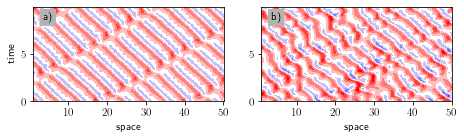

In [20]:
fig, axes = init_2d_fax(ncols=2)

ax = axes[0]
sb_attractor = get_sb_attractor(S=7, interpolate_space=True, interpolate_time=True)
sb_attractor.ds.X[:1000].plot(ax=ax, add_colorbar=False, vmin=-10, vmax=10, levels=10, cmap='bwr')

ax = axes[1]
sb_attractor = get_sb_attractor(S=10, interpolate_space=True, interpolate_time=True)
sb_attractor.ds.X[:1000].plot(ax=ax, add_colorbar=False, vmin=-10, vmax=10, levels=10, cmap='bwr')
ax.set_ylabel('')
fig.tight_layout()

# Save figure
save_name = plot_save_dir + '/Model-Freezing-X-Waves.png'
fig.savefig(save_name, dpi=1200)